# **CS 5540 Group 6 Final Project Code Part 2. Reg, RF, SVM, ANN: By Danny Satterthwaite and Drew Jepsen**

#OVERVIEW

- link to outline: https://docs.google.com/document/d/1hP9R9FrTY0_MtSadcU9QGb8yvao2zngm/edit
- link to first draft: https://docs.google.com/document/d/1ikphtBtgL7INBx8lieIMRVVmmiJ0ZTQKwR4Gt7ZcWcI/edit?tab=t.0
- **[Link to Final Draft](https://docs.google.com/document/d/1ikphtBtgL7INBx8lieIMRVVmmiJ0ZTQKwR4Gt7ZcWcI/edit?usp=sharing)** PLACEHOLDER



In [ ]:
# import statetments

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import mode
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.metrics import (
    MeanSquaredError,
    MeanAbsoluteError,
    RootMeanSquaredError
)
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
from scipy import stats

In [ ]:
# load everything

from google.colab import drive
drive.mount('/content/drive/')

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS5540/project/' # Drew
#GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS5540/project/Shared with me/project/' #DANNY
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

# Load the dataset
train_df = pd.read_csv(GOOGLE_DRIVE_PATH+'data/train.csv')
test_df = pd.read_csv(GOOGLE_DRIVE_PATH+'data/test.csv')
stores_df = pd.read_csv(GOOGLE_DRIVE_PATH+'data/stores.csv')
features_df = pd.read_csv(GOOGLE_DRIVE_PATH+'data/features.csv')

In [ ]:
# Import statemeents HARD FILES
#train_df = pd.read_csv(r"/Users/dannysatterthwaite/Downloads/project/data/train.csv")
#test_df = pd.read_csv(r"/Users/dannysatterthwaite/Downloads/project/data/test.csv")
#stores_df = pd.read_csv(r"/Users/dannysatterthwaite/Downloads/project/data/stores.csv")
#features_df = pd.read_csv(r"/Users/dannysatterthwaite/Downloads/project/data/features.csv")

In [ ]:
print("Train Data:")
display(train_df.head())

print("\nTest Data:")
display(test_df.head())

print("\nStores Data:")
display(stores_df.head())

print("\nFeatures Data:")
display(features_df.head())

Train Data:


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False



Test Data:


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False



Stores Data:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875



Features Data:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
# Merge datasets to get all features in one dataframe
# NOTE TO SELF, DESPITE IT SAYING TRAIN, IT'S REALLY EVERYTHING, THIS IS JUST A NAMING LEFTOVER OF THE KAGGLE DATA
train_df = pd.merge(train_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
train_df = pd.merge(train_df, stores_df, on=['Store'], how='left')

# Handle missing values in MarkDown columns
# Fill missing markdowns with 0
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
train_df[markdown_cols] = train_df[markdown_cols].fillna(0)

# Handle missing values in other columns
train_df['CPI'].fillna(train_df['CPI'].mean(), inplace=True)
train_df['Unemployment'].fillna(train_df['Unemployment'].mean(), inplace=True)

# Feature engineering
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Week'] = train_df['Date'].dt.isocalendar().week

# Encode categorical variables
train_df['IsHoliday'] = train_df['IsHoliday'].astype(int)  # Converts True/False to 1/0

# One-hot encoding for Store Type (from stores.csv)
train_df = pd.get_dummies(train_df, columns=['Type'], drop_first=True)



#REMOVED THIS AS WE DO IT IN ALL THE MODLES INTERNALLLY
# Feature Scaling
#scaler = StandardScaler()
#numerical_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales'] + markdown_cols
#train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

# Display the preprocessed dataframe
train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Size          421570 non-null  int64         
 15  Year          421

### Get the counts of holidays (Informs our decision for classification scoring metric)
- 29661 holidays, 391909 not holidays = 29661/(29661+391909) =7%. Thus clearly our dataset is inbalanced so we don't want to us just strait up accuracy
-Is it better to use precision or recall? --> precision is perfered when we dont want to say a week is a holiday week when in fact it is not. Ie, if we say its a holiday week, it must be a holiday week. So the bar is high so some weeks that are holday weeks don't get tagged (mistakes) as holiday weeks.
- Recall would be to cast a wide net so we make sure we get all the instances of holidays weeks knowing we may tag a few weeks that arent holiday weeks as holiday weeks
- So what do we want:
- https://scikit-learn.org/dev/modules/model_evaluation.html#scoring-parameter


In [ ]:
counts_holiday = train_df['IsHoliday'].value_counts()
display(counts_holiday)

IsHoliday
0    391909
1     29661
Name: count, dtype: int64

#Phase 1 Models
- Initial goal is to predict sales (Y) using everything but date (X). We will expand upon this later.
- Note to self, of course we don't include week as "week" may effectivly uniquely correspond to a sales total.

In [ ]:
# Defining X and Y
X = train_df.drop(['Weekly_Sales', 'Date'], axis=1)
y = train_df['Weekly_Sales']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Phase 1 Linear Reg

#Phase 2
- Goals: EVERYTHING

## **Before** we proceed with our test train splits etc, we build and define functions to run 3-fold cross validation using random search. The next section has functions for polyomial regression, polynomial logistic regression, SVM, and random forests. We create appropriate test and train splits and call the desired model/function for said model in the next portion of phase 2
- sources:
- https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html
- https://medium.com/@wl8380/title-building-a-linear-regression-model-with-mse-and-r-squared-in-python-9df41472cf04
- https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
- https://www.kaggle.com/code/jonleon/use-pipelines-and-score-with-cross-validation
- https://www.kaggle.com/code/willkoehrsen/intro-to-model-tuning-grid-and-random-search
- https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/



## We also want to add a toggle for the number of values of each hyper param that forms the grid and then the number of combos overall we search.

In [ ]:
# for each hyperparam --> 5 or 10
numberOfEach=10

# overal number of combos --> 10-15
numberOfCombos=15



### Poly reg function

In [ ]:
# creating a function to do polynila regerssion with elastic net and k fold corss val

def poly_reg_regularization_random_search(X_train, y_train, X_test, y_test, max_degree=3, iters=numberOfCombos, folds=3, random_state=42):

  pipeline = Pipeline([
      ('poly', PolynomialFeatures()),
      ('scaler', StandardScaler()),
      ('elastic_net', ElasticNet(random_state=random_state)) # defaults on everything naimly the l1 ratio
  ])


  # random searching over a space of alpha while doing our k folds
  alpha_random_search=RandomizedSearchCV(
      pipeline,

      # key is here our params are the alpha and the ratio of ridge to lass (l1_ratio) so we want to look over it all. we also want to look at degree as a parameter so pass in max degree
      param_distributions={'elastic_net__alpha': np.logspace(0, 5, numberOfEach),  # param ranges to make the grid. we can make bigger or smaller depending on run time
                           'elastic_net__l1_ratio': np.linspace(0.001, 1, numberOfEach),
                            'poly__degree': np.arange(1, max_degree+1)},

      cv=folds,
      refit=True,
      scoring='neg_mean_squared_error',
      n_iter=iters,
      random_state=random_state,
      n_jobs=-1,
      verbose=3
      )

  #fit the model and get predicitons
  alpha_random_search.fit(X_train, y_train)


  #get the best model
  best_model = alpha_random_search.best_estimator_

  best_params = alpha_random_search.best_params_
  print(f"\n\nThe best params are is: {best_params}")

   # metrics for training -------

  #get the training root mean squared error
  y_pred_train=best_model.predict(X_train)
  root_mse_train=np.sqrt(np.mean((y_train- y_pred_train)**2))
  print(f"\n\nThe training error using root mean square error is: {root_mse_train}")

  # mse
  mse_train=np.mean((y_train- y_pred_train) ** 2)
  print(f"\n\nThe training error using mean square error is: {mse_train}")

  #MAE
  mae_train=np.mean(np.abs(y_train- y_pred_train))
  print(f"\n\nThe training error using mean absolute error is: {mae_train}")






  # metrics for test ----------------------------------

  # get the testing root mse
  y_pred_test=best_model.predict(X_test)
  root_mse_test=np.sqrt(np.mean((y_test-y_pred_test)**2))
  print(f"\n\nThe testing error using root mean square error is: {root_mse_test}")


  # mse
  mse_test=np.mean((y_test-y_pred_test) ** 2)
  print(f"\n\nThe testing error using mean square error is: {mse_test}")

  #MAE
  mae_test=np.mean(np.abs(y_test-y_pred_test))
  print(f"\n\nThe testing error using mean absolute error is: {mae_test}")



  # print summary stats on y test so we have context

  mean_y_test = np.mean(y_test)
  median_y_test = np.median(y_test)
  std_y_test = np.std(y_test)
  min_y_test = np.min(y_test)
  max_y_test = np.max(y_test)
  quantiles_y_test = np.percentile(y_test, [25, 50, 75])
  print(f"\n\nStatistics on y_test:")
  print(f"Mean: {mean_y_test}")
  print(f"Median: {median_y_test}")
  print(f"Standard Deviation: {std_y_test}")
  print(f"Min: {min_y_test}")
  print(f"Max: {max_y_test}")
  print(f"Quantiles (25th, 50th, 75th): {quantiles_y_test}")
  print("----------------------------------------------------------------------------------------------------")



  return {
        'root_mse_train': root_mse_train,
        'root_mse_test': root_mse_test,
        'mse_train': mse_train,
        'mse_test': mse_test,
        'mae_train': mae_train,
        'mae_test': mae_test
    }





### Random forest regression function
-  Now including feature importance

In [ ]:

def random_forest_regression_regularization_random_search(X_train, y_train, X_test, y_test, max_degree=3, iters=numberOfCombos, folds=3, random_state=42, save_path=None):

  pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('random_forest', RandomForestRegressor(random_state=random_state)) # defaults on everything naimly the l1 ratio
  ])

  # random searching over a space of alpha while doing our k folds
  alpha_random_search=RandomizedSearchCV(
      pipeline,

      #key params are the number of trees. probably more but this is a good starting point
      param_distributions={'random_forest__n_estimators': np.arange(10, 200, numberOfEach), 'random_forest__max_depth': [5, 15, 30] },

      cv=folds,
      refit=True,
      scoring='neg_mean_squared_error',
      n_iter=iters,
      random_state=random_state,
      n_jobs=-1,
      verbose=3
      )

  #fit the model and get predicitons
  alpha_random_search.fit(X_train, y_train)


  #get the best model
  best_model = alpha_random_search.best_estimator_

  best_params = alpha_random_search.best_params_
  print(f"\n\nThe best params are is: {best_params}")


   # metrics for training -------

   # FEATURE IMPORTANCE------------------------
   # GET THE FEATURE IMPORATANCE OF OUR 'random_forest' regressor defined via the pipeline
  feature_importances = best_model.named_steps['random_forest'].feature_importances_
  feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
  print("\n\nFeature Importances:")
  print(feature_importance_df)

  # plotting
  fix, ax= plt.subplots()
  bars = ax.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
  ax.set_xticklabels(feature_importance_df['Feature'], rotation=90)
  ax.set_xlabel('Feature')
  ax.set_ylabel('Importance')
  ax.set_title('Feature Importances')
  ax.bar_label(bars, fmt='%.2f')
  ax.set_xlim(right=15)
  plt.tight_layout()  # Adjust layout to prevent overlap
  plt.tight_layout()
  #plt.show()
  plt.savefig(save_path)
  print(f"Feature importance plot saved to {save_path}")



  #---------------------



  #get the training root mean squared error
  y_pred_train=best_model.predict(X_train)
  root_mse_train=np.sqrt(np.mean((y_train- y_pred_train)**2))
  print(f"\n\nThe training error using root mean square error is: {root_mse_train}")

  # mse
  mse_train=np.mean((y_train- y_pred_train) ** 2)
  print(f"\n\nThe training error using mean square error is: {mse_train}")

  #MAE
  mae_train=np.mean(np.abs(y_train- y_pred_train))
  print(f"\n\nThe training error using mean absolute error is: {mae_train}")


  # metrics for test ----------------------------------

  # get the testing root mse
  y_pred_test=best_model.predict(X_test)
  root_mse_test=np.sqrt(np.mean((y_test-y_pred_test)**2))
  print(f"\n\nThe testing error using root mean square error is: {root_mse_test}")


  # mse
  mse_test=np.mean((y_test-y_pred_test) ** 2)
  print(f"\n\nThe testing error using mean square error is: {mse_test}")

  #MAE
  mae_test=np.mean(np.abs(y_test-y_pred_test))
  print(f"\n\nThe testing error using mean absolute error is: {mae_test}")

    # print summary stats on y test so we have context

  mean_y_test = np.mean(y_test)
  median_y_test = np.median(y_test)
  std_y_test = np.std(y_test)
  min_y_test = np.min(y_test)
  max_y_test = np.max(y_test)
  quantiles_y_test = np.percentile(y_test, [25, 50, 75])
  print(f"\n\nStatistics on y_test:")
  print(f"Mean: {mean_y_test}")
  print(f"Median: {median_y_test}")
  print(f"Standard Deviation: {std_y_test}")
  print(f"Min: {min_y_test}")
  print(f"Max: {max_y_test}")
  print(f"Quantiles (25th, 50th, 75th): {quantiles_y_test}")
  print("----------------------------------------------------------------------------------------------------")






  return {
        'root_mse_train': root_mse_train,
        'root_mse_test': root_mse_test,
        'mse_train': mse_train,
        'mse_test': mse_test,
        'mae_train': mae_train,
        'mae_test': mae_test
    }


## SVM To Do Regression So We Can Compare All 3 Approaches

In [ ]:
#just setting some initial defaults
def svm_regerssion_grid_reg(X_train, y_train, X_test, y_test, max_degree=3, iters=numberOfCombos, folds=3, random_state=42):

  pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('svr', SVR(kernel='rbf')) #polynomal kerenl
  ])


  # random searching over a space of alpha while doing our k folds
  alpha_random_search=RandomizedSearchCV(
      pipeline,

      # so really just our regulaization parameter is what we are going to adjust
      param_distributions={'svr__C': np.logspace(-2, 2, numberOfEach),  # note it uses c isntead of alpha but c=1/alpha
                            'svr__gamma': np.logspace(-3, 3, numberOfEach)},

      cv=folds,
      scoring='neg_mean_squared_error',
      n_iter=iters,
      random_state=random_state,
      verbose=3,
      n_jobs=-1
      )

  #fit the model and get predicitons
  alpha_random_search.fit(X_train, y_train)


  #get the best model
  best_model = alpha_random_search.best_estimator_


  best_params = alpha_random_search.best_params_
  print(f"\n\nThe best params are is: {best_params}")

  # training metrics------------------------

  #get the training root mean squared error
  y_pred_train=best_model.predict(X_train)
  root_mse_train=np.sqrt(np.mean((y_train- y_pred_train)**2))
  print(f"\n\nThe training error using root mean square error is: {root_mse_train}")

  # mse
  mse_train=np.mean((y_train- y_pred_train) ** 2)
  print(f"\n\nThe training error using mean square error is: {mse_train}")

  #MAE
  mae_train=np.mean(np.abs(y_train- y_pred_train))
  print(f"\n\nThe training error using mean absolute error is: {mae_train}")



  # metrics for test ----------------------------------

  # get the testing root mse
  y_pred_test=best_model.predict(X_test)
  root_mse_test=np.sqrt(np.mean((y_test-y_pred_test)**2))
  print(f"\n\nThe testing error using root mean square error is: {root_mse_test}")


  # mse
  mse_test=np.mean((y_test-y_pred_test) ** 2)
  print(f"\n\nThe testing error using mean square error is: {mse_test}")

  #MAE
  mae_test=np.mean(np.abs(y_test-y_pred_test))
  print(f"\n\nThe testing error using mean absolute error is: {mae_test}")


    # print summary stats on y test so we have context

  mean_y_test = np.mean(y_test)
  median_y_test = np.median(y_test)
  std_y_test = np.std(y_test)
  min_y_test = np.min(y_test)
  max_y_test = np.max(y_test)
  quantiles_y_test = np.percentile(y_test, [25, 50, 75])
  print(f"\n\nStatistics on y_test:")
  print(f"Mean: {mean_y_test}")
  print(f"Median: {median_y_test}")
  print(f"Standard Deviation: {std_y_test}")
  print(f"Min: {min_y_test}")
  print(f"Max: {max_y_test}")
  print(f"Quantiles (25th, 50th, 75th): {quantiles_y_test}")
  print("----------------------------------------------------------------------------------------------------")





  return {
        'root_mse_train': root_mse_train,
        'root_mse_test': root_mse_test,
        'mse_train': mse_train,
        'mse_test': mse_test,
        'mae_train': mae_train,
        'mae_test': mae_test
    }

### Logistic poly reg function

In [ ]:

# POLYNOMIAL LOGISTIC REGRESSION
def poly_logistic_reg_regularization_random_search(X_train, y_train, X_test, y_test, max_degree=3, iters=numberOfCombos, folds=3, random_state=42):

  pipeline = Pipeline([
      ('poly', PolynomialFeatures()),
      ('scaler', StandardScaler()),
      ('log_reg', LogisticRegression(random_state=random_state, solver='saga', max_iter=1000, penalty='elasticnet'))
  ])


  # random searching over a space of alpha while doing our k folds
  alpha_random_search=RandomizedSearchCV(
      pipeline,

      # key is here our params are the c and the ratio of ridge to lass (l1_ratio) so we want to look over it all. we also want to look at degree as a parameter so pass in max degree
      param_distributions={'log_reg__C': np.logspace(-3, 1, numberOfEach),  # note it uses c isntead of alpha but c=1/alpha
                           'log_reg__l1_ratio': np.linspace(0.001, 1, numberOfEach),
                            'poly__degree': np.arange(1, max_degree+1)},

      cv=folds,
      refit=True,
      scoring='precision', # good starting point but we can add others if we want/ need to
      n_iter=iters,
      random_state=random_state,
      n_jobs=-1,
      verbose=3
      )

  #fit the model and get predicitons
  alpha_random_search.fit(X_train, y_train)


  #get the best model
  best_model = alpha_random_search.best_estimator_


  best_params = alpha_random_search.best_params_
  print(f"\n\nThe best params are is: {best_params}")


  # training metrics------------------------

  #get the training f1 score
  y_pred_train=best_model.predict(X_train)

  #f1
  f1_training=f1_score(y_train, y_pred_train)
  print(f"\n\nThe training f1 score is  {f1_training}")

  #accuracy
  accuracy_training=accuracy_score(y_train, y_pred_train)
  print(f"\n\nThe training accuracy score is  {accuracy_training}")

  #precision
  precision_training=precision_score(y_train, y_pred_train)
  print(f"\n\nThe training precision score is  {precision_training}")

  #recall
  recall_training=recall_score(y_train, y_pred_train)
  print(f"\n\nThe training recall score is  {recall_training}")


  # testing metrics------------------------

  # get the testing f1 score
  y_pred_test=best_model.predict(X_test)

  #f1
  f1_testing=f1_score(y_test, y_pred_test)
  print(f"\n\nThe testing f1 score is: {f1_testing}")

  #accuracy
  accuracy_testing=accuracy_score(y_test, y_pred_test)
  print(f"\n\nThe testing accuracy score is  {accuracy_testing}")

  #precision
  precision_testing=precision_score(y_test, y_pred_test)
  print(f"\n\nThe testing precision score is  {precision_testing}")

  #recall
  recall_testing=recall_score (y_test, y_pred_test)
  print(f"\n\nThe testing recall score is  {recall_testing}")


    # print summary stats on y test so we have context

  mean_y_test = np.mean(y_test)
  median_y_test = np.median(y_test)
  std_y_test = np.std(y_test)
  min_y_test = np.min(y_test)
  max_y_test = np.max(y_test)
  quantiles_y_test = np.percentile(y_test, [25, 50, 75])
  print(f"\n\nStatistics on y_test:")
  print(f"Mean: {mean_y_test}")
  print(f"Median: {median_y_test}")
  print(f"Standard Deviation: {std_y_test}")
  print(f"Min: {min_y_test}")
  print(f"Max: {max_y_test}")
  print(f"Quantiles (25th, 50th, 75th): {quantiles_y_test}")
  print("----------------------------------------------------------------------------------------------------")



  return {
        'f1_training': f1_training,
        'f1_testing': f1_testing,
        'accuracy_training': accuracy_training,
        'accuracy_testing': accuracy_testing,
        'precision_training': precision_training,
        'precision_testing': precision_testing,
        'recall_training': recall_training,
        'recall_testing': recall_testing
    }




### SVM (classifcation function)

In [ ]:
#just setting some initial defaults
def svm_classifcation_grid_regularized(X_train, y_train, X_test, y_test, max_degree=3, iters=numberOfCombos, folds=3, random_state=42):

  pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('svm', SVC(random_state=random_state, kernel='poly')) #polynomal kerenl
  ])


  # random searching over a space of alpha while doing our k folds
  alpha_random_search=RandomizedSearchCV(
      pipeline,

      # so really just our regulaization parameter is what we are going to adjust
      param_distributions={'svm__C': np.logspace(-2, 2, numberOfEach),  # note it uses c isntead of alpha but c=1/alpha
                            'svm__degree': np.arange(1, max_degree+1)},

      cv=folds,
      scoring='precision', # good starting point but we can add others if we want/ need to
      n_iter=iters,
      random_state=random_state,
      verbose=3,
      n_jobs=-1
      )

  #fit the model and get predicitons
  alpha_random_search.fit(X_train, y_train)


  #get the best model
  best_model = alpha_random_search.best_estimator_


  best_params = alpha_random_search.best_params_
  print(f"\n\nThe best params are is: {best_params}")

  # training metrics------------------------

  #get the training f1 score
  y_pred_train=best_model.predict(X_train)

  #f1
  f1_training=f1_score(y_train, y_pred_train)
  print(f"\n\nThe training f1 score is  {f1_training}")

  #accuracy
  accuracy_training=accuracy_score(y_train, y_pred_train)
  print(f"\n\nThe training accuracy score is  {accuracy_training}")

  #precision
  precision_training=precision_score(y_train, y_pred_train)
  print(f"\n\nThe training precision score is  {precision_training}")

  #recall
  recall_training=recall_score(y_train, y_pred_train)
  print(f"\n\nThe training recall score is  {recall_training}")


  # testing metrics------------------------

  # get the testing f1 score
  y_pred_test=best_model.predict(X_test)

  #f1
  f1_testing=f1_score(y_test, y_pred_test)
  print(f"\n\nThe testing f1 score is: {f1_testing}")

  #accuracy
  accuracy_testing=accuracy_score(y_test, y_pred_test)
  print(f"\n\nThe testing accuracy score is  {accuracy_testing}")

  #precision
  precision_testing=precision_score(y_test, y_pred_test)
  print(f"\n\nThe testing precision score is  {precision_testing}")

  #recall
  recall_testing=recall_score (y_test, y_pred_test)
  print(f"\n\nThe testing recall score is  {recall_testing}")



    # print summary stats on y test so we have context

  mean_y_test = np.mean(y_test)
  median_y_test = np.median(y_test)
  std_y_test = np.std(y_test)
  min_y_test = np.min(y_test)
  max_y_test = np.max(y_test)
  quantiles_y_test = np.percentile(y_test, [25, 50, 75])
  print(f"\n\nStatistics on y_test:")
  print(f"Mean: {mean_y_test}")
  print(f"Median: {median_y_test}")
  print(f"Standard Deviation: {std_y_test}")
  print(f"Min: {min_y_test}")
  print(f"Max: {max_y_test}")
  print(f"Quantiles (25th, 50th, 75th): {quantiles_y_test}")
  print("----------------------------------------------------------------------------------------------------")



  return {
        'f1_training': f1_training,
        'f1_testing': f1_testing,
        'accuracy_training': accuracy_training,
        'accuracy_testing': accuracy_testing,
        'precision_training': precision_training,
        'precision_testing': precision_testing,
        'recall_training': recall_training,
        'recall_testing': recall_testing
    }

# Random Forest For Classifcation So We Compare the 3 Approaches

In [ ]:

def random_forest_classification_regularization_random_search(X_train, y_train, X_test, y_test, max_degree=3, iters=numberOfCombos, folds=3, random_state=42, save_path=None):

  pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('random_forest', RandomForestClassifier(random_state=random_state)) # defaults on everything naimly the l1 ratio
  ])

  # random searching over a space of alpha while doing our k folds
  alpha_random_search=RandomizedSearchCV(
      pipeline,

      #key params are the number of trees. probably more but this is a good starting point
      param_distributions={'random_forest__n_estimators': np.arange(10, 200, numberOfEach), 'random_forest__max_depth': [5, 15, 30] },

      cv=folds,
      refit=True,
      scoring='precision',
      n_iter=iters,
      random_state=random_state,
      n_jobs=-1,
      verbose=3
      )

  #fit the model and get predicitons
  alpha_random_search.fit(X_train, y_train)


  #get the best model
  best_model = alpha_random_search.best_estimator_

  best_params = alpha_random_search.best_params_
  print(f"\n\nThe best params are is: {best_params}")


   # metrics for training -------

   # FEATURE IMPORTANCE------------------------
   # GET THE FEATURE IMPORATANCE OF OUR 'random_forest' regressor defined via the pipeline
  feature_importances = best_model.named_steps['random_forest'].feature_importances_
  feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
  print("\n\nFeature Importances:")
  print(feature_importance_df)

  # plotting
  fix, ax= plt.subplots()
  bars = ax.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
  ax.set_xticklabels(feature_importance_df['Feature'], rotation=90)
  ax.set_xlabel('Feature')
  ax.set_ylabel('Importance')
  ax.set_title('Feature Importances')
  ax.bar_label(bars, fmt='%.2f')
  ax.set_xlim(right=15)
  plt.tight_layout()  # Adjust layout to prevent overlap
  #plt.show()
  plt.savefig(save_path)
  print(f"Feature importance plot saved to {save_path}")



  #---------------------

# training metrics------------------------

  #get the training f1 score
  y_pred_train=best_model.predict(X_train)

  #f1
  f1_training=f1_score(y_train, y_pred_train)
  print(f"\n\nThe training f1 score is  {f1_training}")

  #accuracy
  accuracy_training=accuracy_score(y_train, y_pred_train)
  print(f"\n\nThe training accuracy score is  {accuracy_training}")

  #precision
  precision_training=precision_score(y_train, y_pred_train)
  print(f"\n\nThe training precision score is  {precision_training}")

  #recall
  recall_training=recall_score(y_train, y_pred_train)
  print(f"\n\nThe training recall score is  {recall_training}")


  # testing metrics------------------------

  # get the testing f1 score
  y_pred_test=best_model.predict(X_test)

  #f1
  f1_testing=f1_score(y_test, y_pred_test)
  print(f"\n\nThe testing f1 score is: {f1_testing}")

  #accuracy
  accuracy_testing=accuracy_score(y_test, y_pred_test)
  print(f"\n\nThe testing accuracy score is  {accuracy_testing}")

  #precision
  precision_testing=precision_score(y_test, y_pred_test)
  print(f"\n\nThe testing precision score is  {precision_testing}")

  #recall
  recall_testing=recall_score (y_test, y_pred_test)
  print(f"\n\nThe testing recall score is  {recall_testing}")


    # print summary stats on y test so we have context

  mean_y_test = np.mean(y_test)
  median_y_test = np.median(y_test)
  std_y_test = np.std(y_test)
  min_y_test = np.min(y_test)
  max_y_test = np.max(y_test)
  quantiles_y_test = np.percentile(y_test, [25, 50, 75])
  print(f"\n\nStatistics on y_test:")
  print(f"Mean: {mean_y_test}")
  print(f"Median: {median_y_test}")
  print(f"Standard Deviation: {std_y_test}")
  print(f"Min: {min_y_test}")
  print(f"Max: {max_y_test}")
  print(f"Quantiles (25th, 50th, 75th): {quantiles_y_test}")
  print("----------------------------------------------------------------------------------------------------")



  return {
        'f1_training': f1_training,
        'f1_testing': f1_testing,
        'accuracy_training': accuracy_training,
        'accuracy_testing': accuracy_testing,
        'precision_training': precision_training,
        'precision_testing': precision_testing,
        'recall_training': recall_training,
        'recall_testing': recall_testing
    }



## Now we create the various train test split subsets based on the desired features for our goals

In [ ]:
# summmary stats function



def get_summary_stats(column):
    if not isinstance(column, pd.Series):
        raise TypeError("Input must be a pandas Series.")

    column = column.dropna()

    stats_dict = {
        "Mean": column.mean(),
        "Median": column.median(),
        "Mode": column.mode().iloc[0] if not column.mode().empty else None,
        "Standard Deviation": column.std(),
        "Variance": column.var(),
        "Minimum": column.min(),
        "Maximum": column.max(),
        "Range": column.max() - column.min(),
        "25th Percentile": column.quantile(0.25),
        "50th Percentile (Median)": column.quantile(0.5),
        "75th Percentile": column.quantile(0.75),
        "90th Percentile": column.quantile(0.9),
        "Skewness": stats.skew(column),
        "Kurtosis": stats.kurtosis(column),
        "Count": column.count()
    }

    for key, value in stats_dict.items():
        print(f"{key}: {value}")

    return stats_dict


# intialize a random selection we will use for svm
train_df_RANDOM=train_df.sample(n=50000, random_state=42)


#split 1 (original, full)

X = train_df.drop(['Weekly_Sales', 'Date'], axis=1)
y = train_df['Weekly_Sales']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


print('\n\n The summary stats for y_val (test set 1) are: ')
get_summary_stats(y_val)


# now let's create a random subset of 50k for the random forest




X_rand= train_df_RANDOM.drop(['Weekly_Sales', 'Date'], axis=1)
y_rand= train_df_RANDOM['Weekly_Sales']

X_train_rand, X_val_rand, y_train_rand, y_val_rand = train_test_split(X_rand, y_rand, test_size=0.2, random_state=42)

print('\n\n The summary stats for y_val_ran (test set 1 random ) are: ')
get_summary_stats(y_val_rand)



# splits 2: used for regression 1: --> weekly sales by store, department, and whether it’s a holiday week

X_2 = train_df[['Store', 'Dept', "IsHoliday"]]
y_2= train_df['Weekly_Sales']

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

print('\n\n The summary stats for y_val (test set 2) are: ')
get_summary_stats(y_val_2)




# random
X_2_rand = train_df_RANDOM[['Store', 'Dept', "IsHoliday"]]
y_2_rand= train_df_RANDOM['Weekly_Sales']

X_train_2_rand, X_val_2_rand, y_train_2_rand, y_val_2_rand = train_test_split(X_2_rand, y_2_rand, test_size=0.2, random_state=42)


print('\n\n The summary stats for y_val_2_rand (test set 2 random) are: ')
get_summary_stats(y_val_2_rand)



# split 3: used for regression 2: --> Predict weekly sales by region temperature, fuel price, markdown, consumer price index, and unemployment rate core people stuff

X_3 = train_df[['Store', 'Dept', "IsHoliday", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y_3= train_df['Weekly_Sales']

X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

print('\n\n The summary stats for y_val_3 (test set 3) are: ')
get_summary_stats(y_val_3)





#random
X_3_rand = train_df_RANDOM[['Store', 'Dept', "IsHoliday", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y_3_rand= train_df_RANDOM['Weekly_Sales']

X_train_3_rand, X_val_3_rand, y_train_3_rand, y_val_3_rand = train_test_split(X_3_rand, y_3_rand, test_size=0.2, random_state=42)

print('\n\n The summary stats for y_val_3_rand (test set 3 randoms) are: ')
get_summary_stats(y_val_3_rand)





# Split 4: used for regresion 3: --> Predict weekly sales by store, department, week, whether it’s a holiday week, region temperature, fuel price, markdown, consumer price index, and unemployment rate


X_4 = train_df[['Store', 'Dept', "IsHoliday", "Temperature", "Fuel_Price", "CPI", "Unemployment", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]]
y_4= train_df['Weekly_Sales']

X_train_4, X_val_4, y_train_4, y_val_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=42)

print('\n\n The summary stats for y_val_4 (test set 4) are: ')
get_summary_stats(y_val_4)





#random
X_4_rand = train_df_RANDOM[['Store', 'Dept', "IsHoliday", "Temperature", "Fuel_Price", "CPI", "Unemployment", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]]
y_4_rand= train_df_RANDOM['Weekly_Sales']

X_train_4_rand, X_val_4_rand, y_train_4_rand, y_val_4_rand = train_test_split(X_4_rand, y_4_rand, test_size=0.2, random_state=42)


print('\n\n The summary stats for y_val_4_rand (test set 4 random) are: ')
get_summary_stats(y_val_4_rand)


# Split 5: used for regression 4: --> Predicting CPI and gas prices via the sales data
    # ie predict cpi via everything else

X_5 = train_df.drop(['CPI', 'Date'], axis=1)
y_5= train_df['CPI']

X_train_5, X_val_5, y_train_5, y_val_5 = train_test_split(X_5, y_5, test_size=0.2, random_state=42)

print('\n\n The summary stats for y_val_5 (test set 5) are: ')
get_summary_stats(y_val_5)




#random
X_5_rand = train_df_RANDOM.drop(['CPI', 'Date'], axis=1)
y_5_rand= train_df_RANDOM['CPI']

X_train_5_rand, X_val_5_rand, y_train_5_rand, y_val_5_rand = train_test_split(X_5_rand, y_5_rand, test_size=0.2, random_state=42)

print('\n\n The summary stats for y_val_5_rand (test set 5 random) are: ')
get_summary_stats(y_val_5_rand)






# Split 6: used for logistic regression model and svm model : --> predict holiday



X_6 = train_df.drop(['Week', 'Date', 'Month', "IsHoliday"], axis=1)
y_6= train_df['IsHoliday']

X_train_6, X_val_6, y_train_6, y_val_6 = train_test_split(X_6, y_6, test_size=0.2, random_state=42)

print('\n\n The summary stats for y_val_6 (test set 6) are: ')
get_summary_stats(y_val_6)



#random

X_6_rand = train_df_RANDOM.drop(['Week', 'Date', 'Month', "IsHoliday"], axis=1)
y_6_rand= train_df_RANDOM['IsHoliday']

X_train_6_rand, X_val_6_rand, y_train_6_rand, y_val_6_rand = train_test_split(X_6_rand, y_6_rand, test_size=0.2, random_state=42)

print('\n\n The summary stats for y_val_6_rand (test set 6 random) are: ')
get_summary_stats(y_val_6_rand)








 The summary stats for y_val (test set 1) are: 
Mean: 15989.402972341482
Median: 7636.245
Mode: 10.0
Standard Deviation: 22835.87479864735
Variance: 521477177.81949717
Minimum: -3924.0
Maximum: 422306.25
Range: 426230.25
25th Percentile: 2077.8325
50th Percentile (Median): 7636.245
75th Percentile: 20087.8975
90th Percentile: 42932.977
Skewness: 3.206965904508699
Kurtosis: 17.68130223776871
Count: 84314


 The summary stats for y_val_ran (test set 1 random ) are: 
Mean: 16020.774644
Median: 7800.425
Mode: 10.0
Standard Deviation: 22680.840832077047
Variance: 514420540.85001343
Minimum: -863.0
Maximum: 347680.08
Range: 348543.08
25th Percentile: 2144.935
50th Percentile (Median): 7800.425
75th Percentile: 20148.855
90th Percentile: 42803.13
Skewness: 3.1126654561114413
Kurtosis: 15.865057172221068
Count: 10000


 The summary stats for y_val (test set 2) are: 
Mean: 15989.402972341482
Median: 7636.245
Mode: 10.0
Standard Deviation: 22835.87479864735
Variance: 521477177.81949717
Minimum

{'Mean': 0.0753,
 'Median': 0.0,
 'Mode': 0,
 'Standard Deviation': 0.2638879945874156,
 'Variance': 0.06963687368736787,
 'Minimum': 0,
 'Maximum': 1,
 'Range': 1,
 '25th Percentile': 0.0,
 '50th Percentile (Median)': 0.0,
 '75th Percentile': 0.0,
 '90th Percentile': 0.0,
 'Skewness': 3.2189508071922686,
 'Kurtosis': 8.361644299123753,
 'Count': 10000}

# Now lets get a summary view of all of our models so we have them in one place and export the results to a pedf

In [ ]:
# function to do the lifting

# output path
save_directory = "/Users/dannysatterthwaite/Downloads/rf graphs out"

def runAndPrintResults(model_info, save_directory=None):
    full_results_Everything=[]
    for model_name, modelCall, X_train, y_train, X_val, y_val in model_info:
        #run the model
        print(f"Model Name: {model_name}")

        save_path = None

        if save_directory and 'rf' in model_name:
            # create rf with proper file name
            save_path = f"{save_directory}/{model_name}_feature_importance.png"


        if 'rf' in model_name:
            model_results = modelCall(X_train, y_train, X_val, y_val, save_path=save_path)
        else:
            model_results = modelCall(X_train, y_train, X_val, y_val)

        # print results
        model_results['Model Name']=model_name
        full_results_Everything.append(model_results)
    #format to df and display it and return in
    full_results_df=pd.DataFrame(full_results_Everything)
    display(full_results_df)
    return full_results_df




# REGRESSION MODELS

# list of regression models and their respective feature combos we want to try

models_regression_list=[
    ('poly_reg_full', poly_reg_regularization_random_search, X_train, y_train, X_val, y_val),
    ('rf_reg_full', random_forest_regression_regularization_random_search, X_train, y_train, X_val, y_val),
    ('svm_reg_full', svm_regerssion_grid_reg, X_train_rand, y_train_rand, X_val_rand, y_val_rand),
    ('poly_reg_full2', poly_reg_regularization_random_search, X_train_2, y_train_2, X_val_2, y_val_2),
    ('rf_reg_full2', random_forest_regression_regularization_random_search, X_train_2, y_train_2, X_val_2, y_val_2),
    ('svm_reg_full2', svm_regerssion_grid_reg, X_train_2_rand, y_train_2_rand, X_val_2_rand, y_val_2_rand),
    ('poly_reg_full3', poly_reg_regularization_random_search, X_train_3, y_train_3, X_val_3, y_val_3),
   ('rf_reg_full3', random_forest_regression_regularization_random_search, X_train_3, y_train_3, X_val_3, y_val_3),
   ('svm_reg_full3', svm_regerssion_grid_reg, X_train_3_rand, y_train_3_rand, X_val_3_rand, y_val_3_rand),
    ('poly_reg_full4', poly_reg_regularization_random_search, X_train_4, y_train_4, X_val_4, y_val_4),
    ('rf_reg_full4', random_forest_regression_regularization_random_search, X_train_4, y_train_4, X_val_4, y_val_4),
    ('svm_reg_full4', svm_regerssion_grid_reg, X_train_4_rand, y_train_4_rand, X_val_4_rand, y_val_4_rand),
    ('poly_reg_full5', poly_reg_regularization_random_search, X_train_5, y_train_5, X_val_5, y_val_5),
    ('rf_reg_full5', random_forest_regression_regularization_random_search, X_train_5, y_train_5, X_val_5, y_val_5),
   ('svm_reg_full5', svm_regerssion_grid_reg, X_train_5_rand, y_train_5_rand, X_val_5_rand, y_val_5_rand)
]



# CALL AND RUN ALL REGRESSION MODELS
callALLREGMODELS=runAndPrintResults(models_regression_list, save_directory=save_directory)
callALLREGMODELS.to_csv("ml-regression-models-results.csv")





## Call and run the classificaiton models

In [ ]:

# CLASSIFICATION MODELS
models_classification_list=[
    ('poly_log_reg_6', poly_logistic_reg_regularization_random_search, X_train_6, y_train_6, X_val_6, y_val_6),
    ('poly_svm_6', svm_classifcation_grid_regularized, X_train_6_rand, y_train_6_rand, X_val_6_rand, y_val_6_rand),
    ('rf_class_6', random_forest_classification_regularization_random_search, X_train_6, y_train_6, X_val_6, y_val_6),
]


# CALL AND RUN ALL CLASSIFICATION MODELS
callALLCLASSMODELS=runAndPrintResults(models_classification_list, save_directory=save_directory)
callALLCLASSMODELS.to_csv("ML-Classifcation-model-results.csv")


Model Name: poly_log_reg_6
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END log_reg__C=10.0, log_reg__l1_ratio=1.0, poly__degree=1;, score=0.946 total time=   1.4s
[CV 3/3] END log_reg__C=10.0, log_reg__l1_ratio=1.0, poly__degree=1;, score=0.950 total time=   1.3s
[CV 2/3] END log_reg__C=10.0, log_reg__l1_ratio=1.0, poly__degree=1;, score=0.960 total time=   1.5s


/Users/dannysatterthwaite/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END log_reg__C=10.0, log_reg__l1_ratio=1.0, poly__degree=2;, score=0.920 total time= 5.2min


/Users/dannysatterthwaite/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END log_reg__C=10.0, log_reg__l1_ratio=1.0, poly__degree=2;, score=0.921 total time= 5.3min


/Users/dannysatterthwaite/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END log_reg__C=10.0, log_reg__l1_ratio=1.0, poly__degree=2;, score=0.867 total time= 5.3min


The best params are is: {'poly__degree': 1, 'log_reg__l1_ratio': 1.0, 'log_reg__C': 10.0}


The training f1 score is  0.2553580572013752


The training accuracy score is  0.9396304291102308


The training precision score is  0.9520043632397055


The training recall score is  0.14745512143611406


The testing f1 score is: 0.26846795056050593


The testing accuracy score is  0.9396304291102308


The testing precision score is  0.9609053497942387


The testing recall score is  0.15603073838957568


Statistics on y_test:
Mean: 0.07099651303460873
Median: 0.0
Standard Deviation: 0.25681901832150916
Min: 0
Max: 1
Quantiles (25th, 50th, 75th): [0. 0. 0.]
----------------------------------------------------------------------------------------------------
Model Name: poly_svm_6
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END ........svm__C=0.01, svm__degree=1;, score=1.

KeyboardInterrupt: 

# Neural Network SECTION

### Defining the model and creating some helper functions

Epoch 1/20
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 1.0691 - mae: 0.6907 - mse: 1.0691 - rmse: 1.0278 - val_loss: 0.7651 - val_mae: 0.5280 - val_mse: 0.7651 - val_rmse: 0.8747
Epoch 2/20
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.7727 - mae: 0.5503 - mse: 0.7727 - rmse: 0.8788 - val_loss: 0.7516 - val_mae: 0.5214 - val_mse: 0.7516 - val_rmse: 0.8669
Epoch 3/20
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.7553 - mae: 0.5385 - mse: 0.7553 - rmse: 0.8690 - val_loss: 0.6801 - val_mae: 0.4981 - val_mse: 0.6801 - val_rmse: 0.8247
Epoch 4/20
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.6772 - mae: 0.5120 - mse: 0.6772 - rmse: 0.8229 - val_loss: 0.6197 - val_mae: 0.4925 - val_mse: 0.6197 - val_rmse: 0.7872
Epoch 5/20
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.6402 - mae: 0.4992 - mse: 0.6402 - rmse: 0.8001 - val_loss: 0.5666 - val_mae: 0.4768 - val_mse: 0.5666 - val_rmse: 0.7527
Epoch 6/20
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.

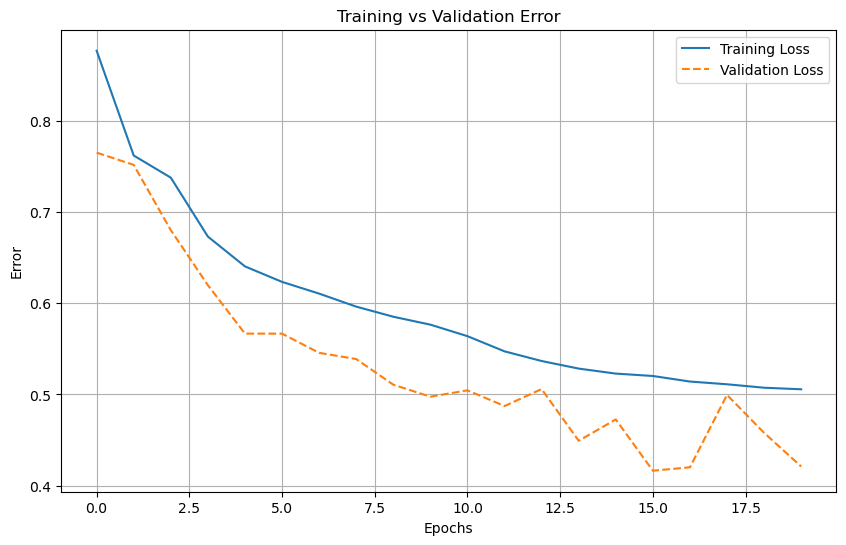

10540/10540 ━━━━━━━━━━━━━━━━━━━━ 5s 422us/step
2635/2635 ━━━━━━━━━━━━━━━━━━━━ 1s 423us/step
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 5s 469us/step - loss: 0.4105 - mae: 0.3943 - mse: 0.4105 - rmse: 0.6407
2635/2635 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - loss: 0.4069 - mae: 0.3971 - mse: 0.4069 - rmse: 0.6378

Training Metrics:
Loss: 0.4105
MSE: 0.4105
MAE: 0.3943
RMSE: 0.6407

Test Metrics:
Loss: 0.4212
MSE: 0.4212
MAE: 0.3971
RMSE: 0.6490

Summary Statistics for y_train:
Mean: 15979.2217
Median: 7607.1553
Mode: 10.0000
Standard Deviation: 22677.5215
Minimum: -4988.9399
Maximum: 693099.3750

Summary Statistics for y_test:
Mean: 15989.4033
Median: 7636.2451
Mode: 10.0000
Standard Deviation: 22835.8379
Minimum: -3924.0000
Maximum: 422306.2500

Summary Statistics for y_train_scaled:
Mean: 0.0000
Median: -0.3691
Mode: -0.7041
Standard Deviation: 1.0000
Minimum: -0.9245
Maximum: 29.8555

Summary Statistics for y_test_scaled:
Mean: 0.0004
Median: -0.3679
Mode: -0.7041
Standard Deviation: 1.0069
Minimu

In [ ]:

# helper funciton to get summary stats
def print_summary_statistics(data, name):
    data_series = pd.Series(data.flatten())
    mode_result = stats.mode(data_series, keepdims=True)
    mode_value = mode_result.mode[0] if mode_result.mode.size > 0 else None
    print(f"\nSummary Statistics for {name}:")
    print(f"Mean: {data_series.mean():.4f}")
    print(f"Median: {data_series.median():.4f}")
    print(f"Mode: {mode_value:.4f}" if mode_value is not None else "Mode: None")
    print(f"Standard Deviation: {data_series.std():.4f}")
    print(f"Minimum: {data_series.min():.4f}")
    print(f"Maximum: {data_series.max():.4f}")


# make sure data is proper tensor flow data via this helper function
def convert_to_float32(data):
    if isinstance(data, pd.DataFrame) or isinstance(data, pd.Series):
        return data.values.astype(np.float32)
    return np.array(data, dtype=np.float32)



# THE MODEL
def ann_model(size):
  model=Sequential([
    # input layer
    Dense(size, input_shape=(size,), kernel_initializer='he_normal'),
    LeakyReLU(alpha=0.1),
    #BatchNormalization(),
    #Dropout(0.3), --> no dropout in the input layer seams to help
    BatchNormalization(),

    #1
    Dense(300),
    LeakyReLU(alpha=0.1),
    #BatchNormalization(),
    Dropout(0.3),
    BatchNormalization(),

    Dense(200),
    LeakyReLU(alpha=0.1),
    #BatchNormalization(),
    Dropout(0.3),
    BatchNormalization(),

    Dense(100),
    LeakyReLU(alpha=0.1),
    #BatchNormalization(),
    Dropout(0.3),
    BatchNormalization(),

    Dense(50),
    LeakyReLU(alpha=0.1),
    #BatchNormalization(),
    Dropout(0.3),
    BatchNormalization(),



    # Dense(50),
    # LeakyReLU(alpha=0.1),
    # #BatchNormalization(),
    # Dropout(0.1),
    # BatchNormalization(),



    # bump down to 1 ouput as its regression
    Dense(1, activation='linear')])

    # compile it, can tinker with this
    # like everything else, base it on mse
  model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=[MeanSquaredError(name='mse'),
                                                              MeanAbsoluteError(name='mae'),
                                                              RootMeanSquaredError(name='rmse')])
  return model







## RNN model calling and testing
- using the same scaling as all other models so we can compare

Epoch 1/20
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 765212800.0000 - mae: 15889.2861 - mse: 765212800.0000 - rmse: 27660.3164 - val_loss: 696758016.0000 - val_mae: 14707.7344 - val_mse: 696758016.0000 - val_rmse: 26396.1738
Epoch 2/20
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 648775680.0000 - mae: 14034.0361 - mse: 648775680.0000 - rmse: 25469.8301 - val_loss: 553185152.0000 - val_mae: 12490.5947 - val_mse: 553185152.0000 - val_rmse: 23519.8887
Epoch 3/20
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 508759872.0000 - mae: 12014.0205 - mse: 508759872.0000 - rmse: 22551.5762 - val_loss: 405343200.0000 - val_mae: 10854.6777 - val_mse: 405343200.0000 - val_rmse: 20133.1367
Epoch 4/20
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 385953600.0000 - mae: 10999.0322 - mse: 385953600.0000 - rmse: 19643.8340 - val_loss: 303483488.0000 - val_mae: 10318.6172 - val_mse: 303483488.0000 - val_rmse: 17420.7773
Epoch 5/20
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - los

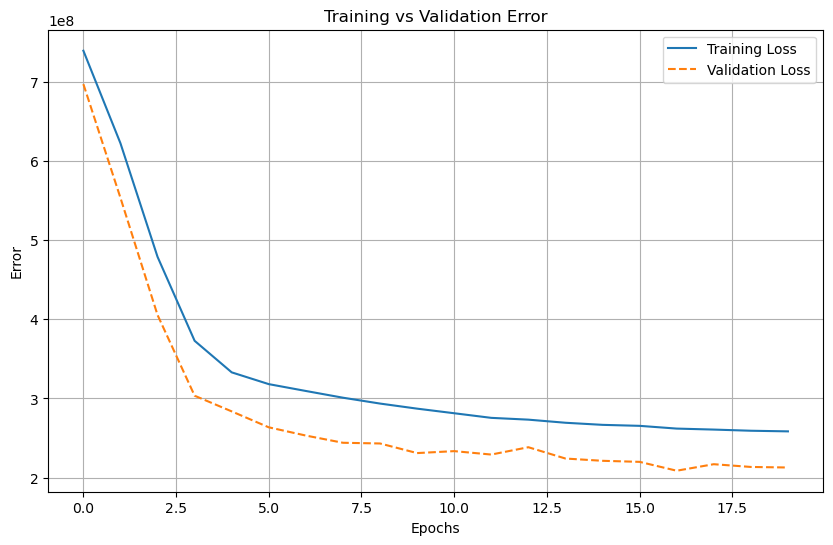

10540/10540 ━━━━━━━━━━━━━━━━━━━━ 5s 436us/step
2635/2635 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step

Training Metrics:
MSE: 206941344.0000
MAE: 8983.2129
RMSE: 14385.4561

Test Metrics:
MSE: 211410800.0000
MAE: 9036.2021
RMSE: 14539.9727

Summary Statistics for y_train:
Mean: 15979.2217
Median: 7607.1553
Mode: 10.0000
Standard Deviation: 22677.5215
Minimum: -4988.9399
Maximum: 693099.3750

Summary Statistics for y_test:
Mean: 15989.4033
Median: 7636.2451
Mode: 10.0000
Standard Deviation: 22835.8379
Minimum: -3924.0000
Maximum: 422306.2500


------------------------
mse_train: 206941344.0000
mae_train: 8983.2129
rmse_train: 14385.4561
mse_test: 211410800.0000
mae_test: 9036.2021
rmse_test: 14539.9727


In [ ]:
def run_ann_model_cross_validated_training_validating(X_train, y_train, X_test, y_test, epochs=50, batch_size=64):


   # convert to right format
    X_train = convert_to_float32(X_train)
    y_train = convert_to_float32(y_train)
    X_test = convert_to_float32(X_test)
    y_test = convert_to_float32(y_test)


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    early_stopping = EarlyStopping(
        monitor="val_loss",
        patience=15,
        restore_best_weights=True
    )


    input_shape = X_train_scaled.shape[1]
    final_model = ann_model(input_shape)


    history = final_model.fit(
        X_train_scaled, y_train,
        epochs=epochs, validation_split=0.2,
        batch_size=batch_size, verbose=1,
        callbacks=[early_stopping]
    )


    if len(history.history['val_loss']) < epochs:
        print("\nEarly stopping triggered!")


    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
    plt.title('Training vs Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()


    # predict
    train_pred = final_model.predict(X_train_scaled)
    test_pred = final_model.predict(X_test_scaled)


    # get all the metrics and print everything

    mse_train = mean_squared_error(y_train, train_pred)
    mse_test = mean_squared_error(y_test, test_pred)
    mae_train = mean_absolute_error(y_train, train_pred)
    mae_test = mean_absolute_error(y_test, test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    print("\nTraining Metrics:")
    print(f"MSE: {mse_train:.4f}")
    print(f"MAE: {mae_train:.4f}")
    print(f"RMSE: {rmse_train:.4f}")

    print("\nTest Metrics:")
    print(f"MSE: {mse_test:.4f}")
    print(f"MAE: {mae_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")

    print_summary_statistics(y_train, "y_train")
    print_summary_statistics(y_test, "y_test")

    return {
        'mse_train': mse_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'mse_test': mse_test,
        'mae_test': mae_test,
        'rmse_test': rmse_test
    }



# actually run it
regression_full=run_ann_model_cross_validated_training_validating(X_train, y_train, X_val, y_val)

# print results for good measure (redundant)
print("\n\n------------------------")

for metric, value in regression_full.items():
    print(f"{metric}: {value:.4f}")

